<h1 style="color:aqua; font-size:24px;">Problem Komiwojażera - projekt nr 1</h1>
<h1 style="color:yellow; font-size:30px;">Algorytm BFS i DFS</h1>
<h1 style="color:white; font-size:24px;">Piotr Włostek</h1>
<h1 style="color:orange; font-size:24px;">259443</h1>


In [1]:
from collections import deque
import random
from IPython.display import display, Markdown
import matplotlib.pyplot as plt


Kolejne litery alfabetu będą reprezentowały losowe wierzchołki o współrzędnych ze zbioru [-100,100] x [0,50] x [-100,100]


In [2]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [3]:
def full_graph(n):
    vertices = list(alphabet)[:n] 
    graph = {}
    for vertex in vertices:
        edges = [v for v in vertices if v != vertex]
        graph[vertex] = edges
    return graph

In [4]:

def generate_n_points_in_given_range(n, xRange = [-100, 100], yRange = [0, 50], zRange = [-100,100]):
    points = {}
    for i in range(n):
        x = random.randint(xRange[0], xRange[1])
        y = random.randint(yRange[0], yRange[1])
        z = random.randint(zRange[0], zRange[1])
        points[alphabet[i]] = [x,y,z]
    return points


Losujemy n wierzchołków

In [5]:
def generate_graph_with_n_coords(n):
    return [full_graph(n), generate_n_points_in_given_range(n)]


all = generate_graph_with_n_coords(11) # n = 11
graph, points = all

In [6]:
for point, coords in points.items():
   x, y, z = coords
   print(f"{point}: ({x}, {y}, {z})")

A: (24, 48, 24)
B: (-6, 8, 51)
C: (-64, 16, 24)
D: (11, 6, -55)
E: (80, 26, -53)
F: (-49, 7, 1)
G: (-45, 49, 25)
H: (-22, 10, -27)
I: (-71, 17, -94)
J: (-26, 11, -91)
K: (-3, 29, -98)


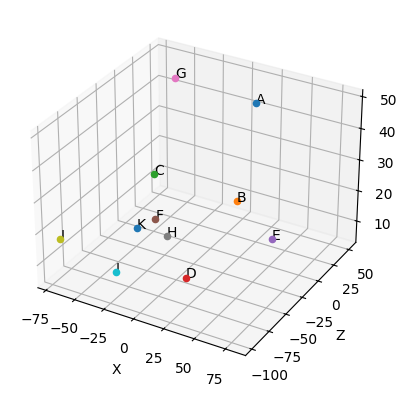

In [7]:
def plot3D(points):
    labels = points.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)


    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    plt.show()

plot3D(points)



In [8]:
display(Markdown(r"Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem"))
display(Markdown(r"$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$"))


Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem

$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$

Funkcja obliczająca odległość Euklidesową między podanymi punktami

In [9]:
def distance(P,Q):
    return ((P[0]-Q[0])**2+(P[1]-Q[1])**2+(P[2]-Q[2])**2)**(1/2)

#przykład
print(distance(points["A"],points["C"]))

93.637599285757


Funkcja obliczająca odległość Euklidesową, ale karząca gdy jedziemy pod górę (yA < yB), oraz nagradzająca gdy jedziemy z górki (yA > yB).

Dobierając parametr kary należy pamiętać żeby był wartością nieujemną, a dobierając parametr nagrody aby był z przedziału [0,1)

In [10]:
def penalty_distance(P, Q, penalty, prize):
    d = distance(P,Q)
    if P[1] < Q[1]:
        return (1+penalty)*d
    if P[1] > Q[1]:
        return(1-prize)*d
    return d

Odległości między wierzchołkami możemy przechowywać w słowniku krawędzi

In [11]:
def distances(points, withPenalty = False):
    distance_dict = {}
    for node1 in points.keys():
        for node2 in points.keys():
            if(node1 != node2):
                if withPenalty:
                    distance_dict[(node1,node2)] = penalty_distance(points[node1],points[node2], 0.4, 0.1) #kara 40%, nagroda 10%
                else:
                    distance_dict[(node1,node2)] = distance(points[node1],points[node2])
    return distance_dict

distances_dict = distances(points)
penalty_distances_dict = distances(points, True)
penalty_distances_dict

{('A', 'B'): 51.14186152263134,
 ('A', 'C'): 84.2738393571813,
 ('A', 'D'): 81.36915877652909,
 ('A', 'E'): 87.94708636447258,
 ('A', 'F'): 78.14467352289599,
 ('A', 'G'): 96.62028772468027,
 ('A', 'H'): 70.64283403148546,
 ('A', 'I'): 139.1657285397522,
 ('A', 'J'): 117.66962224805518,
 ('A', 'K'): 113.74946153718706,
 ('B', 'A'): 79.55400681298208,
 ('B', 'C'): 90.26472179096326,
 ('B', 'D'): 96.63586290813572,
 ('B', 'E'): 190.60577116131608,
 ('B', 'F'): 59.35907681222813,
 ('B', 'G'): 87.18302587086548,
 ('B', 'H'): 111.5089234097433,
 ('B', 'I'): 222.82001705412375,
 ('B', 'J'): 200.80607560529637,
 ('B', 'K'): 210.70348834321658,
 ('C', 'A'): 131.0926390000598,
 ('C', 'B'): 58.02732115133353,
 ('C', 'D'): 98.45029202597624,
 ('C', 'E'): 229.0401711490803,
 ('C', 'F'): 26.0067298982398,
 ('C', 'G'): 53.32879147327455,
 ('C', 'H'): 59.70602984623915,
 ('C', 'I'): 165.4963443705026,
 ('C', 'J'): 109.0969293793368,
 ('C', 'K'): 191.82554574404315,
 ('D', 'A'): 126.57424698571191,
 (

Funkcja sumująca odległość na całej ścieżce.

In [12]:
def get_path_length(path, withPenalty = False):
    dist_dict = {}
    if withPenalty :
        dist_dict = penalty_distances_dict
    else:
        dist_dict = distances_dict
    
    d = 0
    for i in range(len(path)-1):
        node1 = path[i]
        node2 = path[i+1]
        d += dist_dict[(node1,node2)]
    return d
      

#przykład
samplePath = ["A", "D", "C", "B"]
print(samplePath, " ---> ", get_path_length(samplePath))
print(samplePath, " -- pen --> ", get_path_length(samplePath, True))


['A', 'D', 'C', 'B']  --->  264.27419105982096
['A', 'D', 'C', 'B']  -- pen -->  292.54137863493673


Funkcja zwracająca najkrótszą ścieżkę z możliwych

In [13]:
def get_shortest_path(paths, starter_node, withPenalty = False):
    minPathLength = get_path_length(paths[0], withPenalty)
    shortestPath = paths[0]
    for path in paths:
      if get_path_length(path, withPenalty) < minPathLength:
          minPathLength = get_path_length(path, withPenalty)
          shortestPath = path
    shortestPath.append(starter_node)
    return (shortestPath, round(minPathLength,3))

In [14]:
def edges(dist_dict):
    graph = {}
    for edge in dist_dict:
        node1, node2 = edge
        if node1 not in graph:
            graph[node1] = [node2]
        else:
            graph[node1].append(node2)
    return graph

graph = edges(distances_dict)
graph

{'A': ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'B': ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'C': ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'D': ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'E': ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K'],
 'F': ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K'],
 'G': ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'K'],
 'H': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'K'],
 'I': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K'],
 'J': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K'],
 'K': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}

1. Przeszukiwanie wszystkich połączeń. Wagą krawędzi między wierzchołkami jest odległość Euklidesowa

a) Przeszukiwanie wszerz

In [15]:
def BFS(graph, starter_node):
    all_paths = []  
    queue = deque([(starter_node, [starter_node])]) 
    

    while queue:
        node, path = queue.popleft() 
        neighbors = graph.get(node, [])  

        for neighbor in neighbors:
            if neighbor not in path:  
                new_path = path + [neighbor]  
                if len(new_path) == len(graph): 
                    all_paths.append(new_path)
                else:
                    queue.append((neighbor, new_path)) 
    return all_paths
    

In [16]:
paths = BFS(graph, 'A')
shortest_path = get_shortest_path(paths, 'A')
print(shortest_path)

(['A', 'B', 'G', 'C', 'F', 'H', 'I', 'J', 'K', 'D', 'E', 'A'], 506.533)


b) przeszukiwanie w głąb

In [17]:
def DFS(graph, starterNode, path=[]):
    path = path + [starterNode]
    if len(path) == len(graph): 
        return [path]
    paths = []
    for neighbour in graph[starterNode]:
        if neighbour not in path:
            newpaths = DFS(graph, neighbour, path)
            for newpath in newpaths:
                paths.append(newpath)
    return paths

In [18]:
paths = DFS(graph, 'A')
shortest_path = get_shortest_path(paths, 'A')
print(shortest_path)

(['A', 'B', 'G', 'C', 'F', 'H', 'I', 'J', 'K', 'D', 'E', 'A'], 506.533)


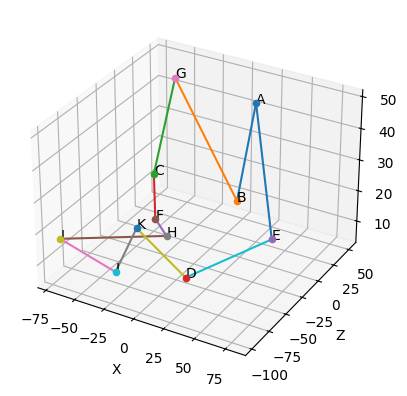

In [19]:
def plot3D_path(path, pointsp):
    labels = pointsp.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    for i in range(len(path) - 1):
        point1 = path[i]
        point2 = path[i + 1]
        ax.plot([points[point1][0], points[point2][0]],
                [points[point1][2], points[point2][2]],
                [points[point1][1], points[point2][1]])
    plt.show()

plot3D_path(shortest_path[0], points)


2. Przeszukiwanie wszystkich połączeń. Wagą krawędzi jest odległość Euklidesowa, ale z karą 40% gdy przechodząc z punktu A=(xA, yA, zA) do B=(xB, yB, zB) idziemy ,,pod górkę" (yA < yB) oraz nagrodą 10% gdy schodzimy (yA > yB) 

a) Przeszukiwanie wszerz

In [20]:
paths = BFS(graph, 'A')
shortest_path = get_shortest_path(paths, 'A', True)
print(shortest_path)

(['A', 'E', 'D', 'K', 'I', 'J', 'H', 'F', 'C', 'G', 'B', 'A'], 569.515)


b) Przeszukiwanie w głąb

In [21]:
paths = DFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A', True)
print(shortest_path)

(['A', 'E', 'D', 'K', 'I', 'J', 'H', 'F', 'C', 'G', 'B', 'A'], 569.515)


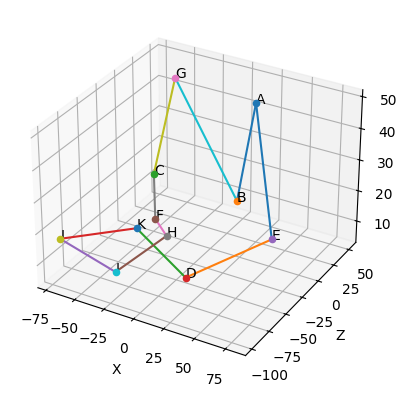

In [22]:
plot3D_path(shortest_path[0], points)


Wyrzucamy losowo p% krawędzi z grafu.

In [23]:
def return_random_edges(dict, p, starter_node):
    dict = {edge: distance for edge, distance in dict.items() if edge[1] != starter_node}
    num_of_edges = int(len(dict)*p)
    edges = random.sample(list(dict.keys()), num_of_edges)
    return edges



In [24]:
def remove_edges(dict, edges_to_remove):
    for edge in edges_to_remove:
        del dict[edge]
    return dict

In [25]:
random_edges = return_random_edges(distances_dict, 0.1, 'A')
print("Usunięte zostaną krawędzie:", ", ".join([str(edge) for edge in random_edges]))
distances_dict = remove_edges(distances_dict, random_edges)
penalty_distances_dict = remove_edges(penalty_distances_dict, random_edges)
graph = edges(distances_dict)
graph

Usunięte zostaną krawędzie: ('A', 'G'), ('I', 'D'), ('G', 'F'), ('E', 'H'), ('K', 'D'), ('A', 'D'), ('F', 'D'), ('K', 'C'), ('I', 'G'), ('H', 'K')


{'A': ['B', 'C', 'E', 'F', 'H', 'I', 'J', 'K'],
 'B': ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'C': ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'D': ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'E': ['A', 'B', 'C', 'D', 'F', 'G', 'I', 'J', 'K'],
 'F': ['A', 'B', 'C', 'E', 'G', 'H', 'I', 'J', 'K'],
 'G': ['A', 'B', 'C', 'D', 'E', 'H', 'I', 'J', 'K'],
 'H': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J'],
 'I': ['A', 'B', 'C', 'E', 'F', 'H', 'J', 'K'],
 'J': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K'],
 'K': ['A', 'B', 'E', 'F', 'G', 'H', 'I', 'J']}

a) Przeszukiwanie wszerz

In [26]:
paths = BFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A')
print(shortest_path)

(['A', 'B', 'G', 'C', 'F', 'H', 'D', 'E', 'K', 'J', 'I', 'A'], 510.422)


b) Przeszukanie w głąb

In [27]:
paths = DFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A')
print(shortest_path)

(['A', 'B', 'G', 'C', 'F', 'H', 'D', 'E', 'K', 'J', 'I', 'A'], 510.422)


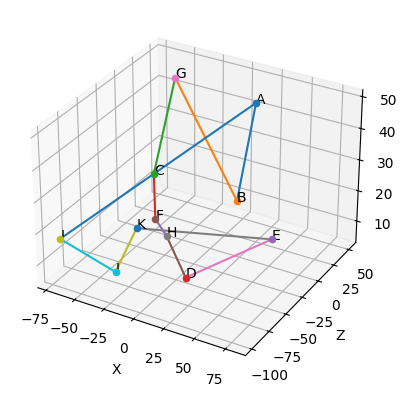

In [28]:
plot3D_path(shortest_path[0], points)

Ponownie przeszukujemy graf, ale z wyrzuconymi krawędziami i karą za drogę w górę i nagrodą za drogę w dół

In [29]:
paths = BFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A', True)
print(shortest_path)

(['A', 'E', 'D', 'K', 'I', 'J', 'H', 'F', 'C', 'G', 'B', 'A'], 569.515)


In [30]:
paths = DFS(graph, 'A')
shortest_path = get_shortest_path(paths,'A', True)
print(shortest_path)

(['A', 'E', 'D', 'K', 'I', 'J', 'H', 'F', 'C', 'G', 'B', 'A'], 569.515)


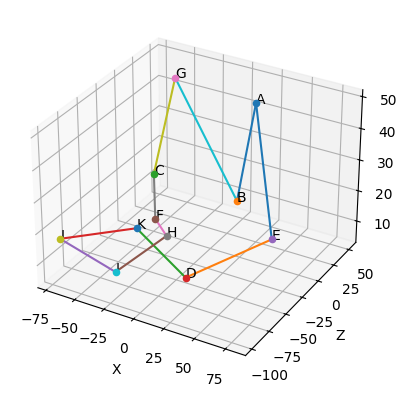

In [31]:
plot3D_path(shortest_path[0], points)